### Configuration

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn import datasets


### SKLearn Iris Data Loader and DataFrame Visualization

In [2]:
# Write Code !!
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### X,y data Generator...Feature and Label

In [3]:
# Write Code !!
X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Training, Test 데이타를 8:2로 비율로 섞고, random_state=42로 지정
    X_train, X_test, y_train, y_test 로 각각 할당된 값들을 torch 타입으로 변환 

In [4]:
from sklearn.model_selection import train_test_split
# Write Code !!
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42, shuffle =True)

X_train = torch.as_tensor(X_train)
X_test = torch.as_tensor(X_test)
y_train = torch.as_tensor(y_train)
y_test = torch.as_tensor(y_test)


#### 하이퍼파라미터 지정

In [5]:
input_size = 4
hidden_size = 56
num_classes = 3
num_epochs = 5
learning_rate = 0.01

### NeuralNetwork  Model Definition

In [6]:
class NeuralNet(nn.Module): 
    def __init__(self, input_size, hidden_size, num_classes): 
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out 

In [7]:
X_train[0,0]

tensor(4.6000, dtype=torch.float64)

### NeuralNetwork  Model Excution , loss, optimizer, backward ..
    Forward Propagation and Baward Propagation

In [8]:
model = NeuralNet(input_size,hidden_size,num_classes)
Loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_list = []
for epoch in range(100):
    # 예측
    pred = model(X_train.float())
    
    # Loss
    loss = Loss_function(pred,y_train.long())
    
    # 초기화
    optimizer.zero_grad()
    
    # 미분
    loss.backward()
    
    # params 갱신
    optimizer.step()
    
    # 시각화를 위한 작업
    
    loss_list.append(float(loss.float()))
    
    if((epoch+1)%10==0):
        print('Epoch [{}/{}], Loss : {}' .format(epoch+1, num_epochs, loss))


# 학습은 100번을 반복합니다 학습이 진행됨에 따라서 Loss가 감소하는 것을 볼수 있도록 출력합니다.

Epoch [10/5], Loss : 0.9198893904685974
Epoch [20/5], Loss : 0.8151769042015076
Epoch [30/5], Loss : 0.735951840877533
Epoch [40/5], Loss : 0.6744020581245422
Epoch [50/5], Loss : 0.6258676648139954
Epoch [60/5], Loss : 0.5875691771507263
Epoch [70/5], Loss : 0.5571109652519226
Epoch [80/5], Loss : 0.532080888748169
Epoch [90/5], Loss : 0.5110099911689758
Epoch [100/5], Loss : 0.49284741282463074


### Epoch(학습)에 따른 Loss감소를 시각화

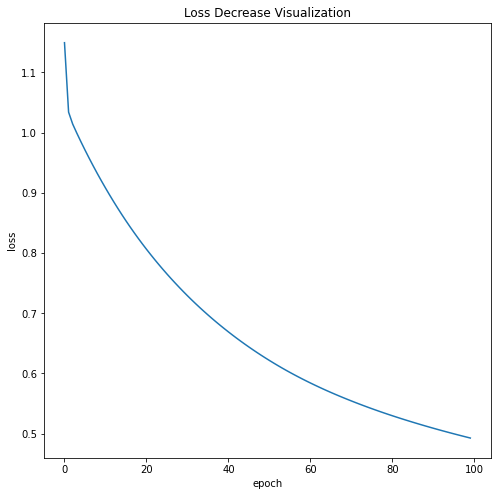

In [9]:
# Write Code !!
plt.figure(figsize=(8,8))
plt.plot(loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Decrease Visualization')
plt.show()

### 학습을 통해서 Loss를 감소시켰다면 이제는Test를 해봅니다.
    테스트 할때는 학습의 의미가 없기때문에 Gradient Descent를 사용하지 않도록 합니다.
    그 결과로 컴퓨터 Performance를 높이는 결과를 가져옵니다.
    이때 우리가 테스트하는 데이타는 이미지가 아니고 단순 숫자 값으로 입력된다는 점을 잘 고려해야합니다.
    출력된 값 중에서 가장 높은 값의 인덱스가 바로 target의 라벨이 됩니다.
    
    예측한 값과 정답을 일일이 비교해서 출력하고
    총 30개의 Test 데이타 중에서 정확하게 맞춘 갯수를 최종적으로 출력합니다.

In [10]:
with torch.no_grad(): 
    correct = 0
    total = 0 
    
    preds = model(X_test.float())
    _,predicted = torch.max(preds,1)
    
    total+=y_test.size(0)
    correct+=(predicted==y_test).sum().item()
    
    print('total : {}, correct : {}'.format(total, correct))
    print('Accuracy {}%' .format(correct/total*100))
    
    



total : 30, correct : 29
Accuracy 96.66666666666667%
